## Import Data 

In [308]:
import pandas as pd

In [309]:
df = pd.read_csv('Data_example.csv', encoding='ISO-8859-1')

In [310]:
df

,X,Y,Z
0,19,1927,cat
1,NaN,2300,dog
2,15,NaN,bird
3,16,5959,cat
4,16,AB,cat
5,NaN,4594,dog
6,19,1927,cat
7,20,2879,birdËÁÒ
8,21,NaN,NaN
9,0,4096,cat


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       17 non-null     object
 1   Y       17 non-null     object
 2   Z       18 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [312]:
df.describe()

,X,Y,Z
count,17,17,18
unique,13,15,5
top,19,1927,cat
freq,3,3,8


## Data Cleaning

In [313]:
df

,X,Y,Z
0,19,1927,cat
1,NaN,2300,dog
2,15,NaN,bird
3,16,5959,cat
4,16,AB,cat
5,NaN,4594,dog
6,19,1927,cat
7,20,2879,birdËÁÒ
8,21,NaN,NaN
9,0,4096,cat


In [314]:
df.drop_duplicates(inplace=True)

df["X"] = pd.to_numeric(df["X"], errors='coerce')   ## replace not-a-number with NAN
df["X"].fillna(value=df["X"].median() , inplace=True)


df["Y"] = pd.to_numeric(df["Y"], errors='coerce')
df["Y"].fillna(value=df["Y"].mean(), inplace=True)


df["Z"].replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True) ## replace not-ascii with ''
df["Z"].fillna(value=df["Z"].mode()[0], inplace=True)


df.drop_duplicates(inplace=True)

df

,X,Y,Z
0,19.0,1927.0,cat
1,20.5,2300.0,dog
2,15.0,3817.0,bird
3,16.0,5959.0,cat
4,16.0,3817.0,cat
5,20.5,4594.0,dog
7,20.0,2879.0,bird
8,21.0,3817.0,cat
9,0.0,4096.0,cat
10,20.5,6730.0,cat


In [315]:
df.describe()

,X,Y
count,18.00000,18.000000
mean,76.00000,3817.000000
std,230.89175,1606.943976
min,0.00000,0.000000
25%,16.75000,2813.750000
50%,20.50000,3817.000000
75%,31.00000,4590.500000
max,1000.00000,6730.000000


## Data Transform

In [316]:
import seaborn as sns
sns.set_theme(style="whitegrid")

from sklearn.preprocessing import MinMaxScaler, StandardScaler

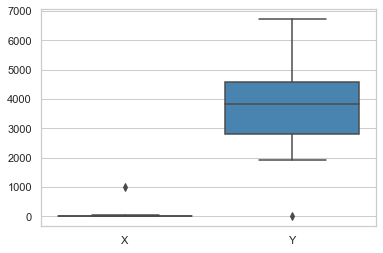

In [317]:
ax = sns.boxplot(data=df, palette="Blues")

In [318]:

# dfTransformed = df.drop(columns=['Z'])
dfTransformed = df

# scaler = MinMaxScaler()
# dfTransformed[["X", "Y"]] = scaler.fit_transform(dfTransformed)

# dfTransformed

In [319]:
# ax = sns.boxplot(data=dfTransformed, palette="Blues")

In [320]:
scaler = StandardScaler()
dfTransformed[["X", "Y"]] = scaler.fit_transform(dfTransformed[["X", "Y"]])

dfTransformed


,X,Y,Z
0,-0.254026,-1.210244,cat
1,-0.247341,-0.971397,dog
2,-0.271852,0.000000,bird
3,-0.267396,1.371610,cat
4,-0.267396,0.000000,cat
5,-0.247341,0.497545,dog
7,-0.249569,-0.600640,bird
8,-0.245113,0.000000,cat
9,-0.338701,0.178655,cat
10,-0.247341,1.865312,cat


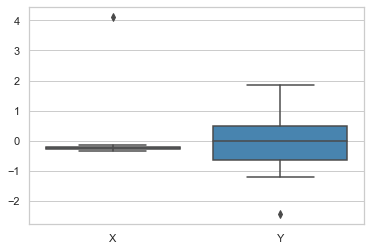

In [321]:

ax = sns.boxplot(data=dfTransformed, palette="Blues")

## Remove outlier

In [322]:
Q1 = dfTransformed["X"].quantile(0.25)
Q3 = dfTransformed["X"].quantile(0.75)

IQR = Q3 - Q1

dfTransformed = dfTransformed[dfTransformed["X"] < Q3 + (1.5 * IQR)]
dfTransformed = dfTransformed[dfTransformed["X"] > Q1 - (1.5 * IQR)]
dfTransformed

,X,Y,Z
0,-0.254026,-1.210244,cat
1,-0.247341,-0.971397,dog
2,-0.271852,0.000000,bird
3,-0.267396,1.371610,cat
4,-0.267396,0.000000,cat
5,-0.247341,0.497545,dog
7,-0.249569,-0.600640,bird
8,-0.245113,0.000000,cat
9,-0.338701,0.178655,cat
10,-0.247341,1.865312,cat


In [323]:
Q1 = dfTransformed["Y"].quantile(0.25)
Q3 = dfTransformed["Y"].quantile(0.75)

IQR = Q3 - Q1

dfTransformed = dfTransformed[dfTransformed["Y"] < Q3 + (1.5 * IQR)]
dfTransformed = dfTransformed[dfTransformed["Y"] > Q1 - (1.5 * IQR)]
dfTransformed

,X,Y,Z
0,-0.254026,-1.210244,cat
1,-0.247341,-0.971397,dog
2,-0.271852,0.000000,bird
3,-0.267396,1.371610,cat
4,-0.267396,0.000000,cat
5,-0.247341,0.497545,dog
7,-0.249569,-0.600640,bird
8,-0.245113,0.000000,cat
9,-0.338701,0.178655,cat
10,-0.247341,1.865312,cat


## Data Transform (AGAIN)

In [324]:
scaler = StandardScaler()
dfTransformed[["X", "Y"]] = scaler.fit_transform(dfTransformed[["X", "Y"]])

dfTransformed


,X,Y,Z
0,-0.204329,-1.566949,cat
1,-0.078588,-1.282837,dog
2,-0.539637,-0.127346,bird
3,-0.455810,1.504205,cat
4,-0.455810,-0.127346,cat
5,-0.078588,0.464491,dog
7,-0.120501,-0.841816,bird
8,-0.036674,-0.127346,cat
9,-1.797043,0.085167,cat
10,-0.078588,2.091471,cat


In [325]:
dfTransformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       16 non-null     float64
 1   Y       16 non-null     float64
 2   Z       16 non-null     object 
dtypes: float64(2), object(1)
memory usage: 512.0+ bytes


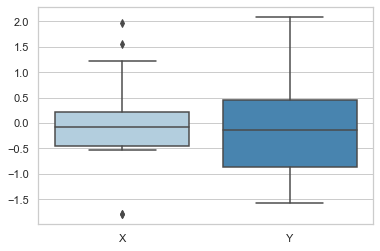

In [326]:
ax = sns.boxplot(data=dfTransformed, palette="Blues")

## Data Category Label

In [327]:
dfTransformed.reset_index(inplace=True)
dfTransformed.drop(columns='index', inplace=True)

In [328]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
ohe = OneHotEncoder()

In [329]:
dfTransformed['Z_category'] = label_encoder.fit_transform(dfTransformed['Z'])
dfTransformed

,X,Y,Z,Z_category
0,-0.204329,-1.566949,cat,1
1,-0.078588,-1.282837,dog,2
2,-0.539637,-0.127346,bird,0
3,-0.455810,1.504205,cat,1
4,-0.455810,-0.127346,cat,1
5,-0.078588,0.464491,dog,2
6,-0.120501,-0.841816,bird,0
7,-0.036674,-0.127346,cat,1
8,-1.797043,0.085167,cat,1
9,-0.078588,2.091471,cat,1


In [330]:
z_arr = ohe.fit_transform(dfTransformed[['Z']]).toarray()
z_arr

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [331]:
z_labels = ohe.categories_
z_labels

[array(['bird', 'cat', 'dog'], dtype=object)]

In [332]:
z_labels = np.array(z_labels).ravel()
z_labels

array(['bird', 'cat', 'dog'], dtype=object)

In [333]:
ohe_df = pd.DataFrame(z_arr, columns=z_labels)

In [334]:
dfTransformed = dfTransformed.join(ohe_df)
dfTransformed

,X,Y,Z,Z_category,bird,cat,dog
0,-0.204329,-1.566949,cat,1,0.0,1.0,0.0
1,-0.078588,-1.282837,dog,2,0.0,0.0,1.0
2,-0.539637,-0.127346,bird,0,1.0,0.0,0.0
3,-0.455810,1.504205,cat,1,0.0,1.0,0.0
4,-0.455810,-0.127346,cat,1,0.0,1.0,0.0
5,-0.078588,0.464491,dog,2,0.0,0.0,1.0
6,-0.120501,-0.841816,bird,0,1.0,0.0,0.0
7,-0.036674,-0.127346,cat,1,0.0,1.0,0.0
8,-1.797043,0.085167,cat,1,0.0,1.0,0.0
9,-0.078588,2.091471,cat,1,0.0,1.0,0.0
